In [109]:
%matplotlib inline
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
import cv2, os
import numpy as np
import random as rd
from tqdm.auto import tqdm
import visualkeras as vk
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [22]:
allImgs = './train_val/'
trainMap = pd.read_csv('train.csv')
valMap = pd.read_csv('val.csv')
ext='.png'
trainImgs=[]
trainLabels=[]
valImgs=[]
valLabels=[]

for i in range(len(trainMap['imgIndex'])):
#     trainImgs.append(cv2.cvtColor(cv2.imread(allImgs+str(trainMap['imgIndex'][i])+ext),cv2.COLOR_BGR2GRAY))
trainImgs = np.array(trainImgs)

trainLabels = np.array(trainMap['label'])
trainImgs=np.array(trainImgs).astype('float32')/255.0

for i in range(len(valMap['imgIndex'])):
#     valImgs.append(cv2.cvtColor(cv2.imread(allImgs+str(valMap['imgIndex'][i])+ext), cv2.COLOR_BGR2GRAY))

valImgs=np.array(valImgs).astype('float32')/255.0
valLabels=np.array(valMap['label'])
classes = list(set(valLabels))
clsDict={}
for i in range(len(classes)):
    clsDict[classes[i]]=i
print(clsDict)

{'vbar_categorical': 0, 'hbar_categorical': 1, 'dot_line': 2, 'pie': 3, 'line': 4}


In [23]:
trainLabels=np.array(list(map(lambda x: clsDict[x], trainLabels)))
trainLabels=np.array(keras.utils.to_categorical(trainLabels))
valLabels=np.array(list(map(lambda x: clsDict[x], valLabels)))
valLabels=np.array(keras.utils.to_categorical(valLabels))


In [24]:
print(valImgs.shape)
print(trainImgs.shape)
print(trainLabels.shape)
print(valLabels.shape)
print(valLabels[:5])
print(valImgs[0])

(150, 128, 128)
(850, 128, 128)
(850, 5)
(150, 5)
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


/home/plant/Envs/anand/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


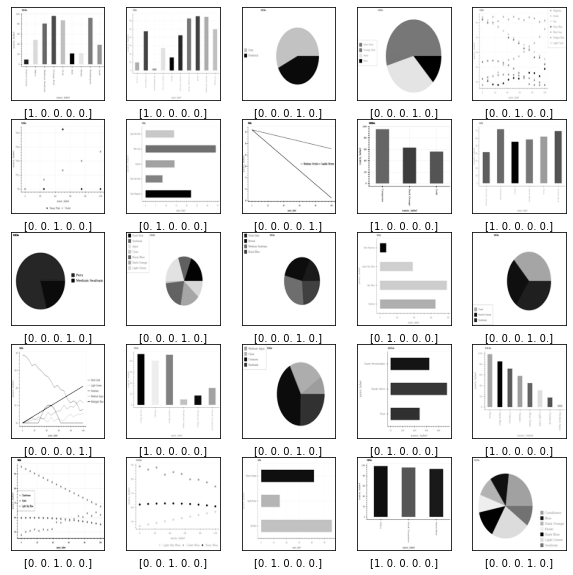

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    randIndex = rd.randrange(0, 850)
    plt.imshow(trainImgs[randIndex],cmap='Greys_r')
    plt.xlabel(trainLabels[randIndex])
plt.show()


In [37]:
model = keras.models.Sequential()

### Convolutional Layer 1
model.add(keras.layers.Conv1D(48, (3), input_shape=(128,128), activation='relu' ))
model.add(keras.layers.MaxPool1D((2)))

### Flatten to 1D and Dense
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(172, activation='relu'))

### Output layer
model.add(keras.layers.Dense(5, activation='softmax'))


model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 126, 48)           18480     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 63, 48)           0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3024)              0         
                                                                 
 dense_6 (Dense)             (None, 172)               520300    
                                                                 
 dense_7 (Dense)             (None, 5)                 865       
                                                                 
Total params: 539,645
Trainable params: 539,645
Non-trainable params: 0
________________________________________________

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights= True, patience=10, verbose=1)
callback = [early_stop]

history = model.fit(trainImgs, trainLabels, epochs=100, 
                    validation_data=(valImgs, valLabels), callbacks=callback)

Epoch 1/100
27/27 [==============================] - 1s 11ms/step - loss: 1.6055 - accuracy: 0.4341 - val_loss: 0.7652 - val_accuracy: 0.6333
Epoch 2/100
27/27 [==============================] - 0s 11ms/step - loss: 0.6143 - accuracy: 0.7176 - val_loss: 0.5189 - val_accuracy: 0.7333
Epoch 3/100
27/27 [==============================] - 0s 8ms/step - loss: 0.4743 - accuracy: 0.7518 - val_loss: 0.4597 - val_accuracy: 0.7533
Epoch 4/100
27/27 [==============================] - 0s 8ms/step - loss: 0.3929 - accuracy: 0.7812 - val_loss: 0.3580 - val_accuracy: 0.8133
Epoch 5/100
27/27 [==============================] - 0s 8ms/step - loss: 0.3857 - accuracy: 0.7882 - val_loss: 0.3684 - val_accuracy: 0.7933
Epoch 6/100
27/27 [==============================] - 0s 8ms/step - loss: 0.3336 - accuracy: 0.7953 - val_loss: 0.3571 - val_accuracy: 0.7933
Epoch 7/100
27/27 [==============================] - 0s 9ms/step - loss: 0.3391 - accuracy: 0.7953 - val_loss: 0.3472 - val_accuracy: 0.7933
Epoch 8/100

In [57]:
for i in history.history.keys():
    print(i+' '*(12-len(i)) +': '+ str(history.history[i][-1]))

loss        : 0.008619577623903751
accuracy    : 1.0
val_loss    : 0.12350974977016449
val_accuracy: 0.9266666769981384


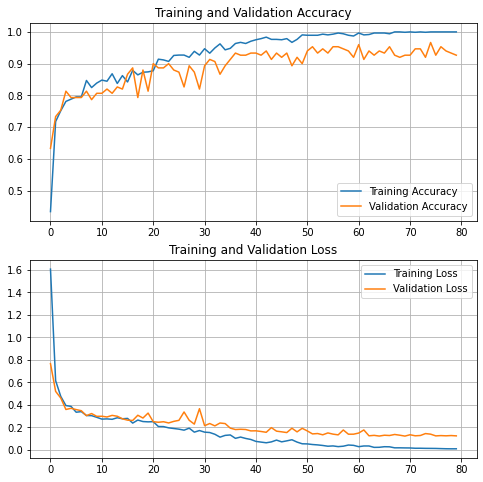

In [48]:
epochs=history.epoch[-1]+1
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.grid()
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
testImg = keras.utils.load_img('./test/1.png', target_size=(128,128), color_mode='grayscale')

In [73]:
img_array = tf.keras.utils.img_to_array(testImg)
img_array = tf.expand_dims(img_array, 0)

In [79]:
predictions = model.predict(img_array)
keyz=list(clsDict.keys()) 
print(keyz[list(predictions[0]).index(1)])

1/1 [==============================] - 0s 19ms/step
hbar_categorical


In [100]:
preds={}
for i in tqdm(range(0, 50)):
    testImg = keras.utils.load_img('./test/{}.png'.format(i), target_size=(128,128), color_mode='grayscale')
    img_array = tf.keras.utils.img_to_array(testImg)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array, verbose=0)
    pred=keyz[list(predictions[0]).index(1)]
    preds[i]=pred
#     plt.imshow(testImg)
#     plt.xlabel(pred)
#     break

  0%|          | 0/50 [00:00<?, ?it/s]

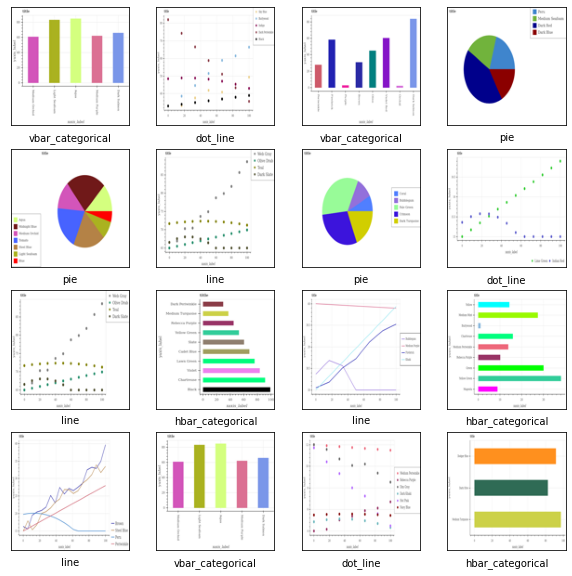

In [104]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    randIndex = rd.choice(list(preds.keys()))
    plt.imshow(cv2.imread('./test/{}.png'.format(randIndex)))
    plt.xlabel(preds[randIndex])
plt.show()

In [111]:
vk.graph_view(model).show()

AttributeError: 'Sequential' object has no attribute '_layers'

In [112]:
model.save('./custModel')

INFO:tensorflow:Assets written to: ./custModel/assets


INFO:tensorflow:Assets written to: ./custModel/assets


In [ ]:
x=open('custPreds.csv', 'w+')
data='imgLabel,pred\n'
for i in preds.keys():
    data+=str(i)+','+preds[i]+'\n'
x.write(data)
x.close()